# Ridge Regression

## Importing the libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the dataset

In [2]:
dataset = pd.read_csv("data/boston-housing-dataset.csv")
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


## Describing the dataset

In [4]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Matrix of features and labels

In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

print(f"X {X.shape}")
print(f"y {y.shape}")

X (506, 13)
y (506,)


## Splitting the dataset into the training set and test set

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

print(f"X_train {X_train.shape}")
print(f"X_test  {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test  {y_test.shape}")

X_train (379, 13)
X_test  (127, 13)
y_train (379,)
y_test  (127,)


## Training the Multiple Linear Regression model

In [7]:
from sklearn.linear_model import Ridge
regressor = Ridge()
regressor.fit(X_train, y_train)

Ridge()

## Predicting the test set

In [8]:
y_pred = regressor.predict(X_test)
pd.options.display.precision = 2
result = pd.DataFrame({"Actual": y_test, "Predict" : y_pred})
result.head(10)

,Actual,Predict
0,22.6,24.99
1,50.0,23.19
2,23.0,28.78
3,8.3,12.02
4,21.2,20.73
5,19.9,19.97
6,20.6,20.14
7,18.7,21.90
8,16.1,19.13
9,18.6,19.73


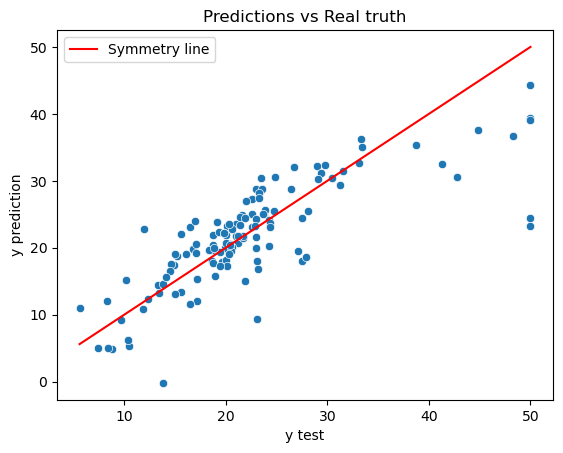

In [9]:
symmetry_line = [y_test.min(), y_test.max()]

sns.scatterplot(x=y_test, y=y_pred)
plt.plot(symmetry_line, symmetry_line, color="red", label="Symmetry line")
plt.xlabel("y test")
plt.ylabel("y prediction")
plt.title("Predictions vs Real truth")
plt.legend()
plt.plot();

## Plotting the residuals

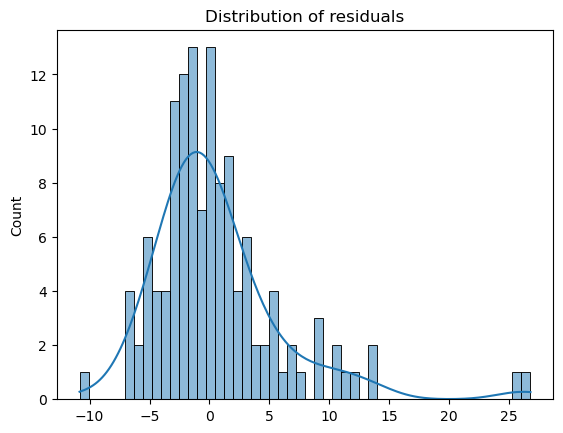

In [10]:
sns.histplot((y_test-y_pred), bins=50, kde=True)
plt.title("Distribution of residuals");

## Observing the coefficients

In [11]:
pd.options.display.precision = 4
coefficients = pd.DataFrame({
    "Columns": dataset.columns[:-1],
    "Coefficient": regressor.coef_,
})
coefficients

,Columns,Coefficient
0,CRIM,-0.1148
1,ZN,0.0454
2,INDUS,-0.0354
3,CHAS,2.3033
4,NOX,-8.1274
5,RM,3.8063
6,AGE,-0.0143
7,DIS,-1.3369
8,RAD,0.2167
9,TAX,-0.0118


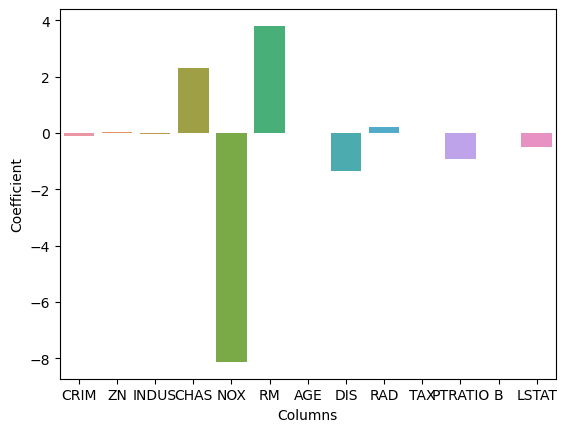

In [12]:
sns.barplot(coefficients, x="Columns", y="Coefficient");

## Evaluating the model

In [13]:
from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"The R2 score of the model: {r2:.3f}")
print(f"The mse of the model: {mse:.3f}")

The R2 score of the model: 0.627
The mse of the model: 30.505
